## Parametry

In [23]:
SERIES_LENGHT = 31
VALUES_DATATYPE = 'float16'
LEARNING_RATE = 0.0006
EPOCHS = 2
BATCH_SIZE = 16

## Wczytanie danych z pliku

In [10]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT))
print(data)
print(data.shape)

[[[-0.2517  -0.2258   0.9707  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   1.058   ...  0.       0.       0.     ]
  [-0.2517  -0.2698   0.9707  ...  0.       0.       0.     ]
  ...
  [-0.05212 -0.577    0.885   ...  0.       0.       0.     ]
  [-0.2517  -0.555    0.6255  ...  0.       0.       0.     ]
  [-0.2517  -0.599    0.885   ...  0.       0.       0.     ]]

 [[-0.2517  -0.2478   1.058   ...  0.       0.       0.     ]
  [-0.2517  -0.2698   0.9707  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   1.058   ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.555    0.6255  ...  0.       0.       0.     ]
  [-0.2517  -0.599    0.885   ...  0.       0.       0.     ]
  [-0.2517  -0.555    0.6255  ...  0.       0.       0.     ]]

 [[-0.2517  -0.2698   0.9707  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   1.058   ...  0.       0.       0.     ]
  [-0.2517  -0.2478   0.9707  ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.599    0.885   ...  0.       0.  

## Wydzielenie zbiorów

In [11]:
from sklearn.model_selection import train_test_split

X = np.swapaxes(data[:, :SERIES_LENGTH - 1, :],1,2)
Y = np.swapaxes(data[:, SERIES_LENGTH - 1:, :],1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (1293987, 35, 30)


## Definicja sieci

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from script.main.loss_functions import *

model = Sequential()
model.add(Dense(128, input_shape=(35, SERIES_LENGTH - 1), activation="relu"))
model.add(LSTM(units=128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(35))
model.compile(loss=mean_square_loss_func, optimizer=RMSProp(lr=LEARNING_RATE), metrics=['accuracy'])

## Uczenie

In [24]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

Train on 1293987 samples
Epoch 1/2
1293987/1293987 - 1639s - loss: 730418.8503 - accuracy: 0.0284
Epoch 2/2
1293987/1293987 - 1674s - loss: 1662601377108.0508 - accuracy: 0.0271


In [17]:
model.evaluate(X_test, Y_test, verbose=0)

[102.38520800149672, 0.028769156]

In [18]:
print(np.round(np.squeeze(model.predict(X_test[0:1,:,:])),2))
print("\n")
print(np.round(np.squeeze(Y_test[0:1]),2))

[ 0.49 -0.39  0.12 -1.22  0.45 -0.29 -0.03 -1.19  0.03 -0.14  2.49 -6.06
 -3.16 -5.91  3.29 -0.82  6.16  5.23 -2.62  4.54 -0.95  3.49  5.07  0.08
 -5.37 -0.01  0.09  0.66  0.    0.02  0.06  0.22 -0.    0.25  0.01]


[-0.05 -0.6  -0.84 -1.03  0.97 -0.48  0.83  0.    0.    0.    0.    0.
  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]


In [19]:
from keras import losses


#print(losses.mean_squared_error(model.predict(X_test[0:1,:,:], Y_test[0:1])))

print(np.squeeze(model.predict(X_test[0:1,:,:])).shape)
print(np.squeeze(Y_test[0:1]).shape)
print(losses.mean_squared_error(np.squeeze(Y_test[0:1]),np.squeeze(model.predict(X_test[0:1,:,:]))))

Using TensorFlow backend.


(35,)
(35,)
tf.Tensor(8.083502, shape=(), dtype=float32)


## Wykres zmiennosci temperatur

### Prawdziwe temperatury

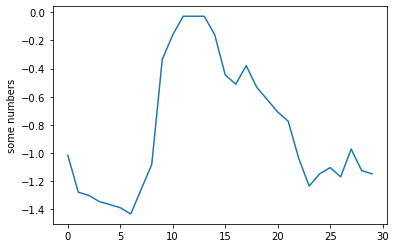

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.squeeze(X_test[1:2:,1:2,:]))
plt.ylabel('some numbers')
plt.show()

### Przewidziane temperatury

(1, 35, 30)


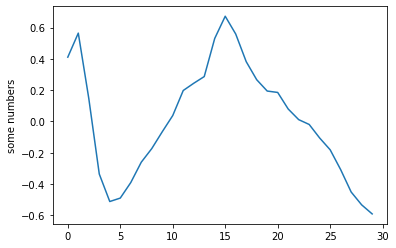

In [21]:
temps = []
temp_row = np.array(X_test[0:1,:,:]) 
for i in range(24):
    predicted = model.predict(temp_row)
    
    predicted[0,7] = int(i==0 or i==1)
    predicted[0,8] = int(i==2 or i==3)
    predicted[0,9] = int(i==4 or i==5)
    predicted[0,10] = int(i==6 or i==7)
    predicted[0,11] = int(i==8 or i==9)
    predicted[0,12] = int(i==10 or i==11)
    predicted[0,13] = int(i==12 or i==13)
    predicted[0,14] = int(i==14 or i==15)
    predicted[0,15] = int(i==16 or i==17)
    predicted[0,16] = int(i==18 or i==19)
    predicted[0,17] = int(i==20 or i==21)
    predicted[0,18] = int(i==22 or i==23)
    
    predicted[0,19] = temp_row[0, 19, 0]
    predicted[0,20] = temp_row[0, 20, 0]
    predicted[0,21] = temp_row[0, 21, 0]
    predicted[0,22] = temp_row[0, 22, 0]
    predicted[0,23] = temp_row[0, 23, 0]
    predicted[0,24] = temp_row[0, 24, 0]
    
    predicted = np.expand_dims(predicted, axis=2)
    temp_row = np.append(arr=temp_row, values=predicted, axis=2)
    temp_row = temp_row[:,:,1:]
print(temp_row.shape)


plt.plot(np.squeeze(temp_row[:,1:2,:]))
plt.ylabel('some numbers')
plt.show()

## 